In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [5]:
[tr_cost_no_reg, test_error_no_reg] = np.load('no_reg.npy')
[tr_cost_det_bi, test_error_det_bi] = np.load('det_binary.npy')
[tr_cost_sto_bi, test_error_sto_bi] = np.load('sto_binary.npy')

In [18]:
max_tr_cost = np.max(np.concatenate([tr_cost_no_reg, tr_cost_det_bi, tr_cost_sto_bi]))

In [10]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
formatter = FuncFormatter(to_percent)

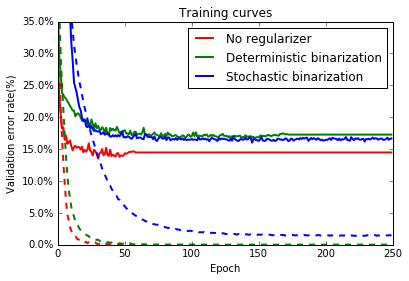

In [24]:
plt.figure()
plt.plot(range(250), test_error_no_reg, 'r', linewidth=2.0)
plt.plot(range(250), test_error_det_bi, 'g', linewidth=2.0)
plt.plot(range(250), test_error_sto_bi, 'b', linewidth=2.0)

plt.plot(range(250), tr_cost_no_reg/max_tr_cost, 'r--', linewidth=2.0)
plt.plot(range(250), tr_cost_det_bi/max_tr_cost, 'g--', linewidth=2.0)
plt.plot(range(250), tr_cost_sto_bi/max_tr_cost, 'b--', linewidth=2.0)
plt.legend(['No regularizer', 'Deterministic binarization', 'Stochastic binarization'])
plt.ylim([0, 0.35])
plt.xlabel('Epoch')
plt.ylabel('Validation error rate(%)')
plt.title('Training curves')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()